# 2019 World Happiness Analysis

As the United States Declaration of Independence states everyone is entitled to "Life, Liberty and the pursuit of Happiness" however, I am curious, what does that pursuit of happiness look like around the world? What does the happiest country look like? And finally, is there a secret formula to happiness?

FUN FACT: International Day of Happiness is on March 20th

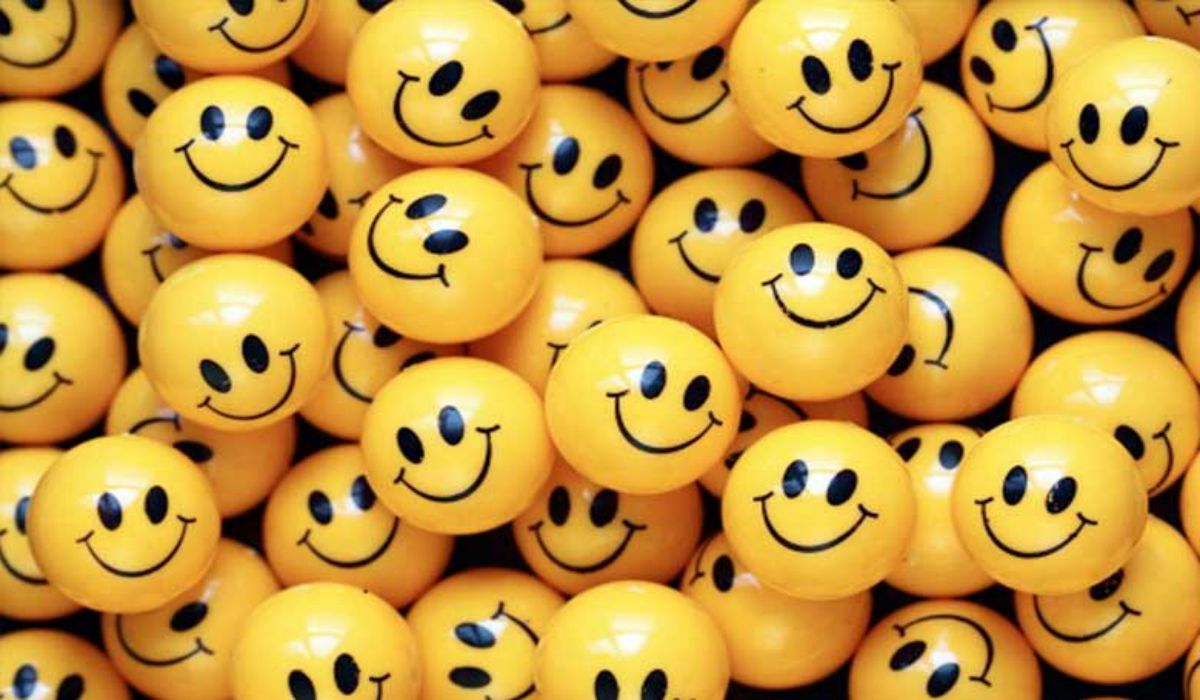

## Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Import Data

In [ ]:
d_2019 = pd.read_csv('../input/world-happiness/2019.csv')
df_2019 = pd.DataFrame(d_2019)

# Analysis

## The Happiest Country in the World

Let's first take a look at the happiest country based on 'Score' according to the data.

In [ ]:
d_2019.loc[d_2019['Score'].idxmax()]

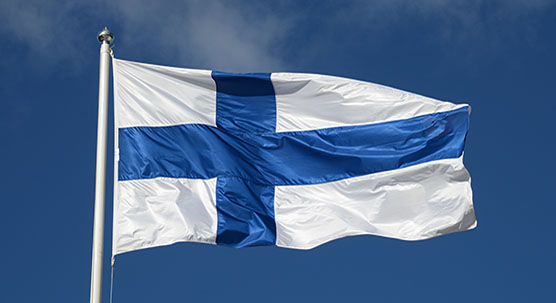

Finland is #1! Finland - the happiest place on earth! 

I see that the score is heavily influenced by social support then by GDP per capita. It's interesting to me that social support played such a big influence. According the website that hosts the World Happiness Report, social support is the national average of binary responses to the Gallup World Poll question, "If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?" Nonetheless, it seems like having good social support systems is imperative.

As for the GDP per capita also having a fairly big influence, it's interesting to note that in 2019 for the World Bank the US ranked #8 in comparison to Finland that ranked #16.

## The Lowest Ranked Country based on Happiness Score

Switching gears now, let's take a look at the country ranked the lowest.

In [ ]:
d_2019.loc[d_2019['Score'].idxmin()]

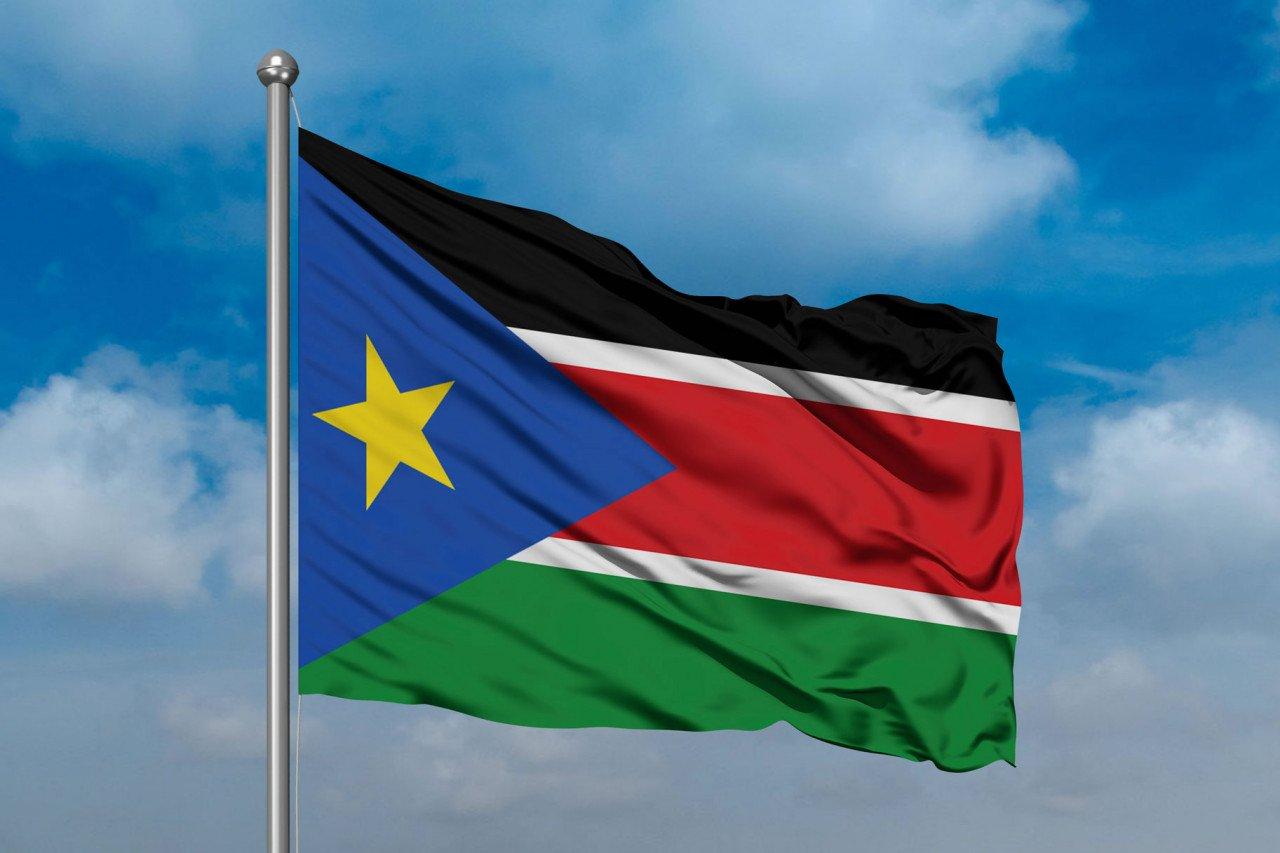

South Sudan ranked the lowest in its happiness score with a 2.853 out of a possible 10.

Ranked noticeably the lowest is the Freedom to make life choices factor. Freedom was the most influential factor for South Sudan ranking so low in its score on happiness and understandably so. The next most influential factor was Perceptions of corruption.

## Correlation between Social Support and Happiness Score?

Considering the fact that social support was the most influential in scoring Finland (the happiest place in the world) so high, I am interested to see if there is a correlation between social support ratings and overall happiness score.

In [ ]:
ss = df_2019['Social support']
rank = df_2019['Score']

Determining the line of best fit.

In [ ]:
denominator = rank.dot(rank) - rank.mean() * rank.sum()

In [ ]:
m = (rank.dot(ss) - ss.mean() * rank.sum()) / denominator
b = (ss.mean() * rank.dot(rank) - rank.mean() * rank.dot(ss)) / denominator 

In [ ]:
y_pred = m*rank + b

In [ ]:
# scatter plot
plt.scatter(rank,ss)
plt.plot(rank,y_pred,'r')
np.corrcoef(rank,ss)

The correlation between social support and happiness score was 0.767, a fairly strong correlation. Mind you there were a few outliers mixed in there as well. I think its safe to conclude that a social support definitely plays a part into our happiness.

## Correlation for each of the predictors

Let's look at what the correlation is between score and each of the contributors. 

In [ ]:
# correlation matrix
df_2019[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices',
                   'Generosity','Perceptions of corruption']].corr()

 Based on the graph above I would have to say **GDP per capita, social support, and healthy life expectancy** have strong correlations to the happiness score. I have to say I am not as surprised, but I also thought freedom would be up there. I do wonder if the data from countries where freedom is a right and therefore possibly not as valued skewed the results.

In [ ]:
# correlation matrix
f = plt.figure(figsize=(15, 12))
plt.matshow(df_2019.corr(), fignum=f.number)
plt.xticks(range(df_2019.shape[1]), df_2019.columns, fontsize=14, rotation=45)
plt.yticks(range(df_2019.shape[1]), df_2019.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## How does the US do in comparison to other countries?

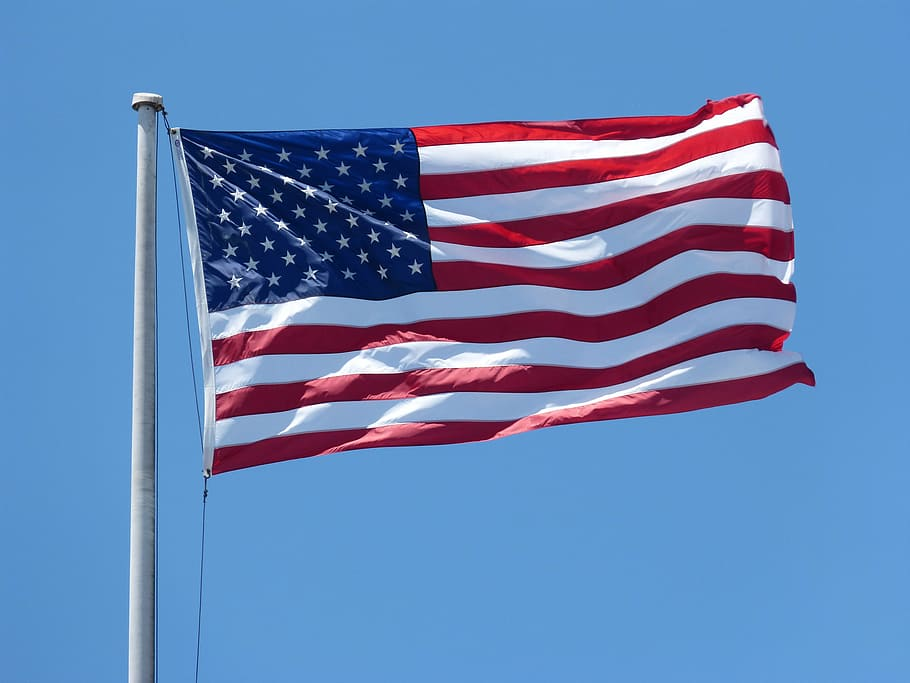

In [ ]:
# filter by US
df_2019.set_index('Country or region', inplace=True)
df_2019.loc['United States']

In 19th place we have the great United States of America with a 6.89 out of a possible 10. Where **GDP per capita** and **social support** almost tie in influence on happiness but, social support prevails as #1.

## Largest contributor to happiness score by Country

In [ ]:
top_inf = df_2019[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices',
                   'Generosity','Perceptions of corruption']].idxmax(axis=1)

In [ ]:
# pie chart
labels = 'Social Support', 'GDP per Capita', 'Generosity'
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0, 0)
plt.pie(top_inf.value_counts(), labels=labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Contributor to Happiness')
plt.axis('equal')
plt.show()

Interesting to see that 87% of the world’s countries would have social support as the #1 influencer on the score. I guess this goes back to the saying that human beings are a social species. Humans are innately social. Our social surroundings play a big part in our happiness and this data proves just that. For another small number of countries, GDP per capita and generosity are important factors.

## Conclusion

In conclusion there was a big trend with social support and just how much it influences our happiness.  Even in the US, social support prevailed as #1. Humans are innately social and it’s important to have a good support system. Even after this analysis I don’t think there is a secret formula, my personal opinion is that all of the factors are pretty important and if 1 were to be taken away such as freedom, happiness levels would definitely take a hit. This data is based on how each individual perceives the world and the reality that they live in, whether that be in persecution or complete freedom. 

My main takeaway was the importance of a good social support system. I’ll be working to foster that for myself. Stay positive and be happy!

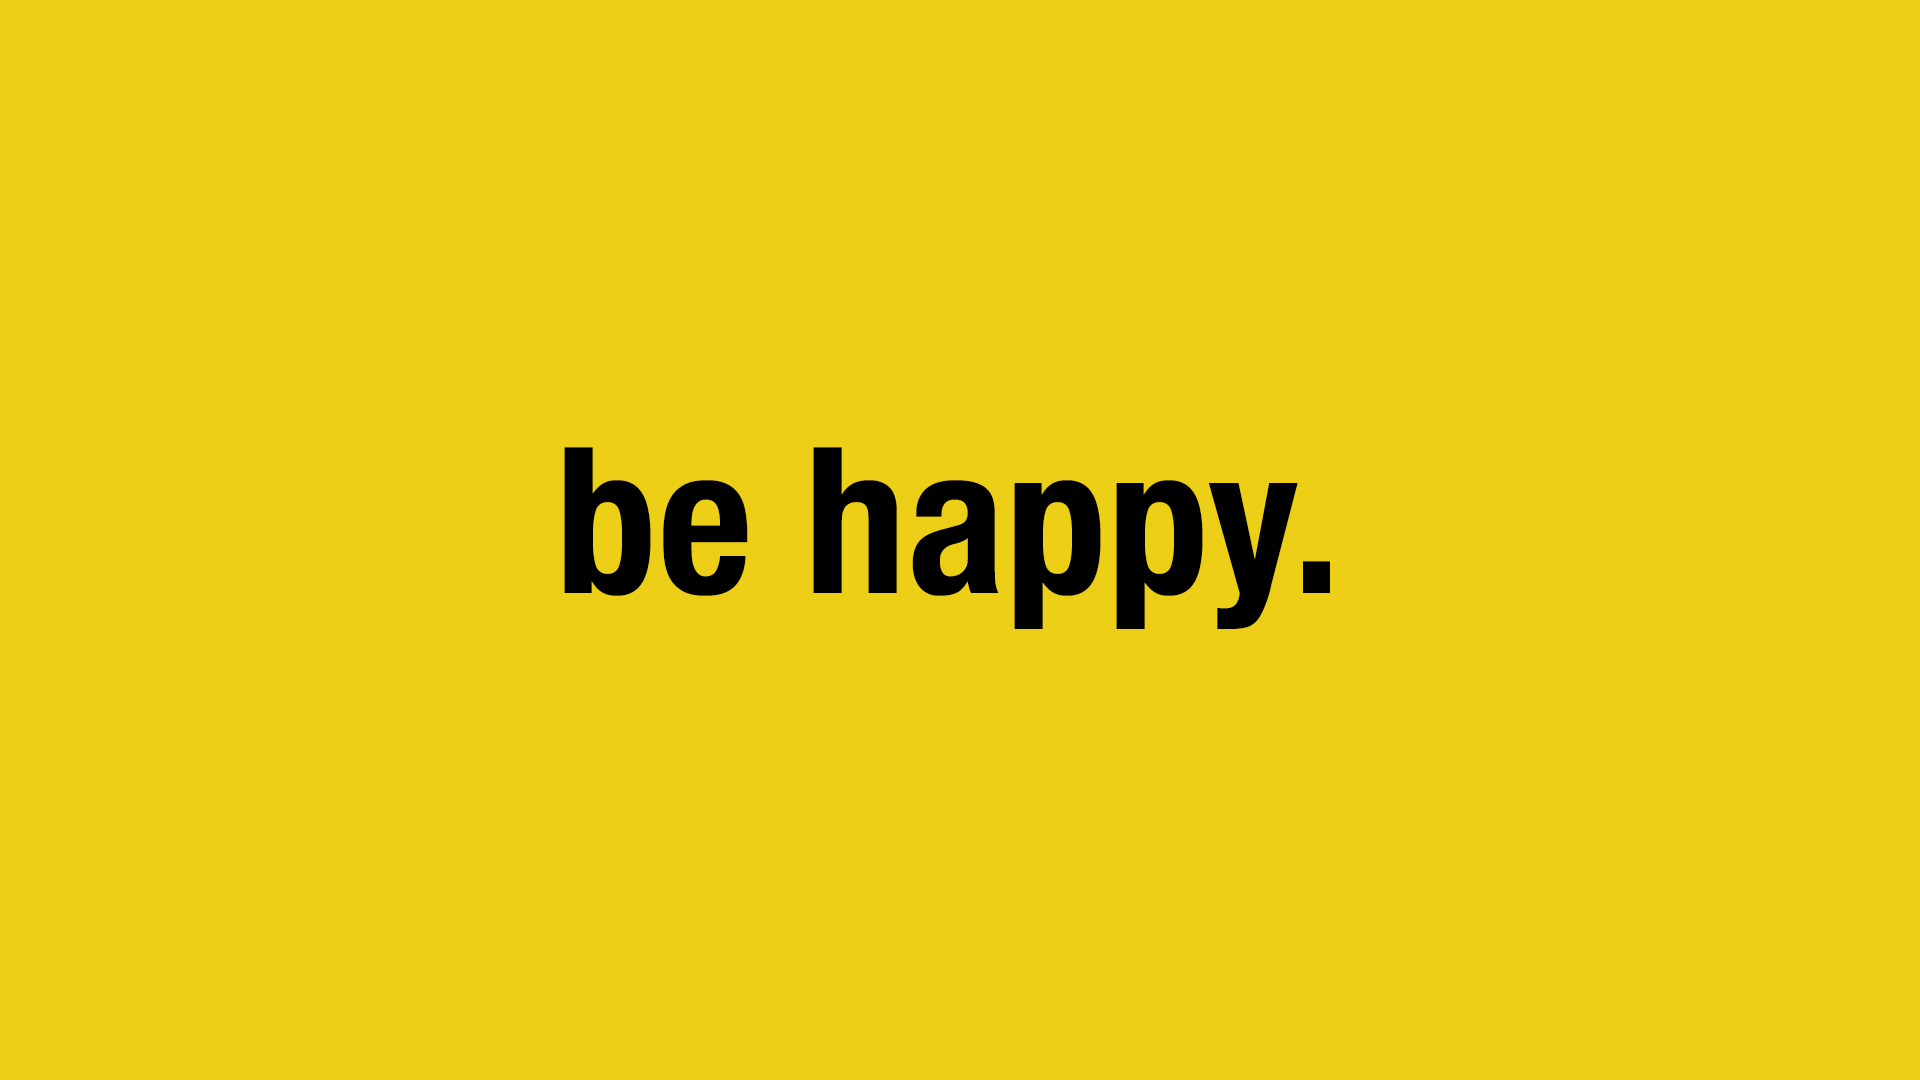